### Stock price prediction of test dataset 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
#'../ gives the relative paths'
model = load_model('../Models/Apple_model.h5')

In [3]:
dataset = pd.read_csv('../Data/AAPL.csv')

In [4]:
dataset = dataset.iloc[:,1:2].values

In [5]:
dataset

array([[1.28348000e-01],
       [1.22210000e-01],
       [1.13281000e-01],
       ...,
       [1.34289993e+02],
       [1.32080002e+02],
       [1.30070007e+02]])

In [6]:
train = dataset[:8375]
test = dataset[8375:]

In [7]:
test.shape

(2093, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = dataset[len(dataset) - len(test) - 60:]
inputs = scaler.fit_transform(inputs)

In [9]:
inputs.shape

(2153, 1)

In [10]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])

In [11]:
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [12]:
predicted_stock_price = model.predict(X_test)

66/66 [==============================] - 2s 13ms/step


In [13]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

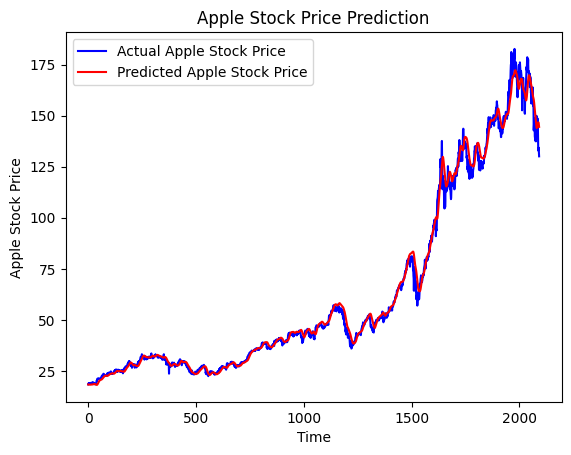

In [14]:
plt.plot(test, color = 'blue', label = 'Actual Apple Stock Price')
plt.plot (predicted_stock_price, color = 'red', label = 'Predicted Apple Stock Price') 
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel ('Apple Stock Price')
plt.legend ()
plt.show()

In [15]:
mse = np.mean((test-predicted_stock_price)**2)
print(f'The test MSE error of the model was {mse}')
print(f'The test RMSE error of the model was {np.sqrt(mse)}')

The test MSE error of the model was 12.261768330112538
The test RMSE error of the model was 3.5016807864384982


In [16]:
#Mean absolute percentage error
MAPE = np.mean(abs((test-predicted_stock_price)/test))
print(f'The MAPE value is : {MAPE}')

The MAPE value is : 0.03300606955226022
